## Elipsoide_Clark_FAT_Classe

## Coisas para importar

In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

from fatiando import mesher, gridder, utils
from fatiando.vis import mpl

import scipy.special
import scipy.interpolate

%matplotlib inline

## Importar minhas funções de um arquivo externo

In [2]:
import Elipsoide_Clark_FAT_Unificado as me5

#### Fatiando a Terra - Ellipsoid

In [3]:
# Malha coordenadas geograficas
xmin = -1000.
xmax = 1000.
ymin = -1000.
ymax = 1000.
Nx = 200
Ny = 200

#xc posicao x , yc posição y e zc profundidade reais
xc = 750.
yc = -750.
zc = 300.

# Orientacoes do elipsoide
azimuth = 53.9
delta = 15.89
gamma = 29.34

# Eixos do elipsoide
a = 150.5
b = 70.500
c = 50.499

# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

################################################################################################################################

# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., 50., 20.
# Create a ellipsoid model
model = [me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, c, azimuth, delta, gamma,
                      {'remanence': np.array([10000, 25., 40.]),
                       'k1': np.array([0.562, 90., 0.]),
                       'k2': np.array([0.485, 180., 0.]),
                       'k3': np.array([0.250, 0., 90.])}
                      ),
         me5.Ellipsoid(Xp, Yp, Zp, -500., -250., zc, a, c, c, azimuth, delta, gamma,
                      {'remanence': np.array([7500, 25., 40.]),
                       'k1': np.array([0.12, 90., 0.]),
                       'k2': np.array([0.10, 180., 0.]),
                       'k3': np.array([0.08, 0., 90.])}
                       ),
         me5.Ellipsoid(Xp, Yp, Zp, -0., 600., zc, b, a, a, 0., 0., gamma,
                      {'remanence': np.array([5000, 25., 40.]),
                       'k1': np.array([0.15, 90., 0.]),
                       'k2': np.array([0.11, 180., 0.]),
                       'k3': np.array([0.05, 0., 90.])}
                      )]

In [4]:
# Calculate the anomaly for a given regional field
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model)

## Resultado da minha função

C:\Anaconda2\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


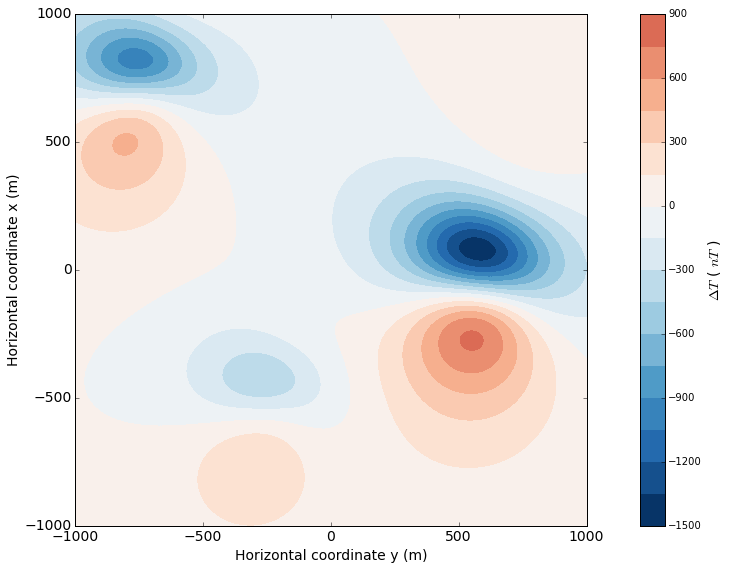

In [5]:
rangesBx = np.max(np.abs([np.max(Bx), np.min(Bx)]))

plt.figure(figsize=(15,8))

#plt.suptitle('Componente do campo Bx ( $nT$ )',y=1.04, fontsize=16, x=0.59)

plt.subplot(1,1,1)
#plt.title('Bx Field Component ( $nT$ )', fontsize=16, y=1.04)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1.)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

plt.savefig('..\\figures\\Elipsoid_Bx.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')

plt.show()

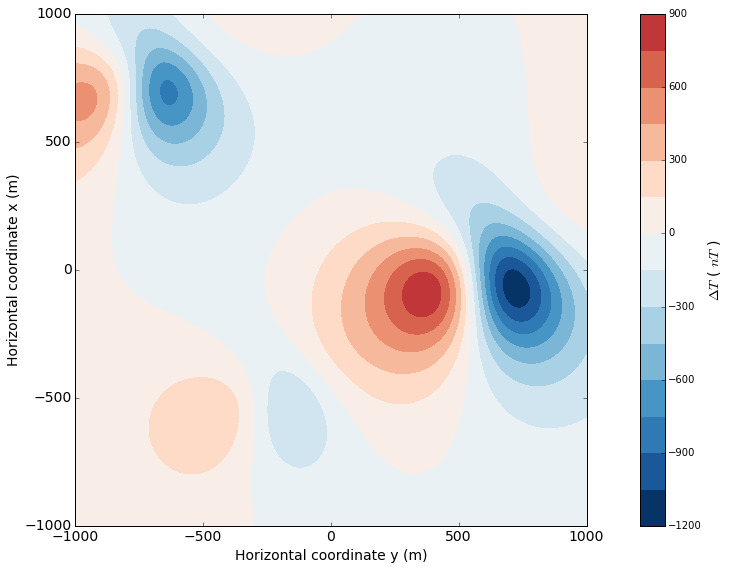

In [6]:
rangesBy = np.max(np.abs([np.max(By), np.min(By)]))

plt.figure(figsize=(15,8))

#plt.suptitle('Componente do campo By ( $nT$ )',y=1.04, fontsize=16, x=0.62)

plt.subplot(1,1,1)
#plt.title('By Field Component ( $nT$ )', fontsize=16, y=1.04)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,By,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1.)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

plt.savefig('..\\figures\\Elipsoid_By.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')

plt.show()

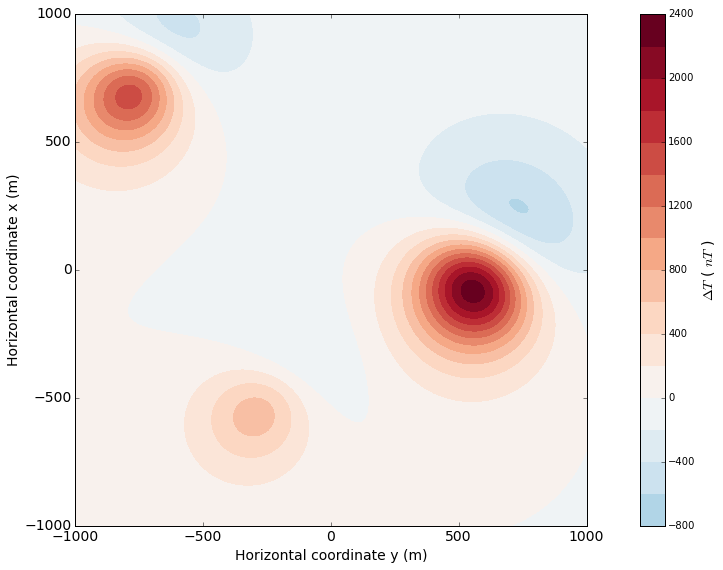

In [7]:
rangesBz = np.max(np.abs([np.max(Bz), np.min(Bz)]))

plt.figure(figsize=(15,8))

#plt.suptitle('Componente do campo Bz ( $nT$ )',y=1.04, fontsize=16, x=0.62)

plt.subplot(1,1,1)
#plt.title('Bz Field Component ( $nT$ )', fontsize=16, y=1.04)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz,15,
             vmin = -rangesBz, vmax = rangesBz,
             cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1.)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

plt.savefig('..\\figures\\Elipsoid_Bz.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')

plt.show()

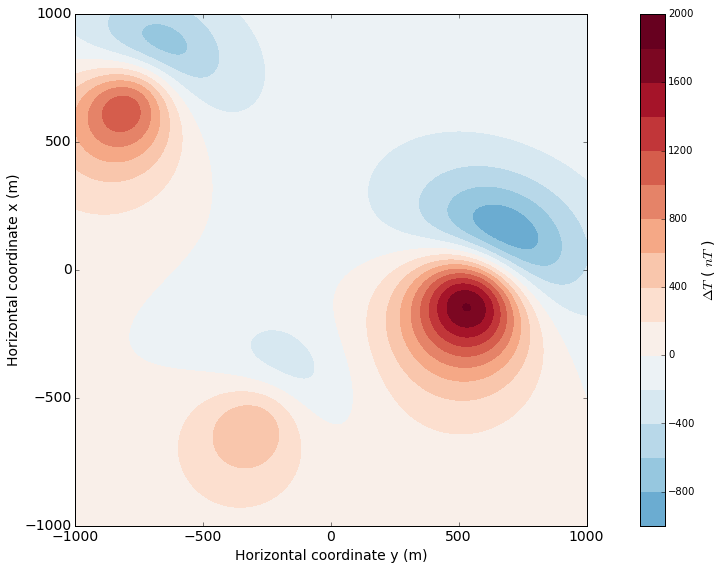

In [8]:
rangesTf = np.max(np.abs([np.max(Tf), np.min(Tf)]))

plt.figure(figsize=(15,8))

#plt.suptitle('Anomalia de campo total aproximada ( $nT$ )',y=1.04, fontsize=16, x=0.62)

plt.subplot(1,1,1)
#plt.title('Approximated total-field anomaly ( $nT$ )', y=1.04,  fontsize=16)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf,15,
             vmin = -rangesTf, vmax = rangesTf,
             cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=1.)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

plt.savefig('..\\figures\\Elipsoid_DeltaT.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')

plt.show()